In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

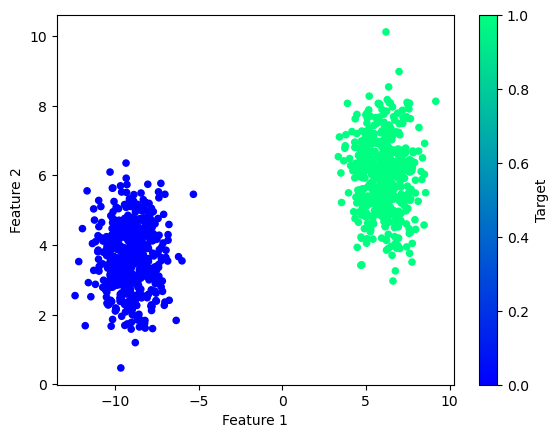

In [7]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [8]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [9]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [11]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [12]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [13]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.8166 - accuracy: 0.1973
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8018 - accuracy: 0.1107
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7887 - accuracy: 0.1400
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7778 - accuracy: 0.1627
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7682 - accuracy: 0.1800
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7599 - accuracy: 0.2013
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7525 - accuracy: 0.2240
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7460 - accuracy: 0.2360
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7402 - accuracy: 0.2613
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7352 - accuracy: 0.2813
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.9373
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.9387
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.9400
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.9440
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3043 - accuracy: 0.9453
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2975 - accuracy: 0.9480
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2909 - accuracy: 0.9480
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2844 - accuracy: 0.9493
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.9493
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2719 - accuracy: 0.9493
Epoch 93/100


<AxesSubplot:>

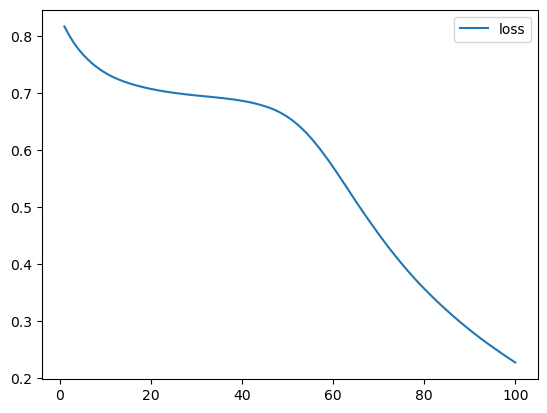

In [16]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

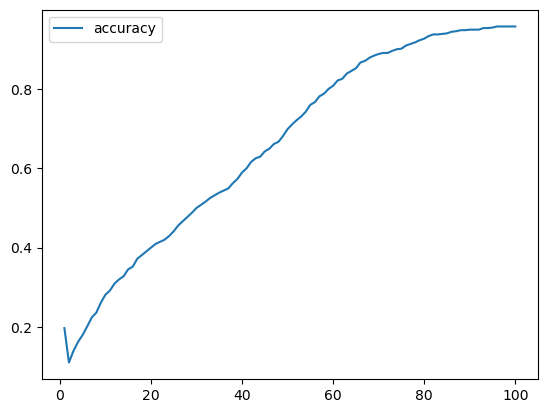

In [17]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.2141 - accuracy: 0.9600 - 234ms/epoch - 29ms/step
Loss: 0.2140754908323288, Accuracy: 0.9599999785423279


In [19]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 105ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

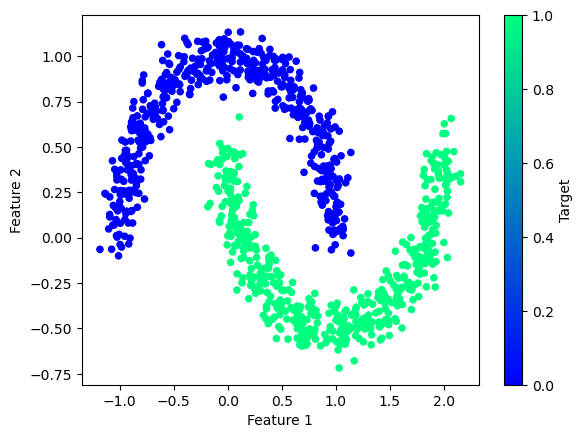

In [20]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [21]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [25]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2702 - accuracy: 0.8893
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2699 - accuracy: 0.8893
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2697 - accuracy: 0.8893
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2695 - accuracy: 0.8893
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2692 - accuracy: 0.8893
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2691 - accuracy: 0.8893
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2689 - accuracy: 0.8893
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2687 - accuracy: 0.8907
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.8907
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2684 - accuracy: 0.8907
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2556 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2553 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2551 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2550 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2550 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.8920
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.8920
Epoch 93/100


<AxesSubplot:>

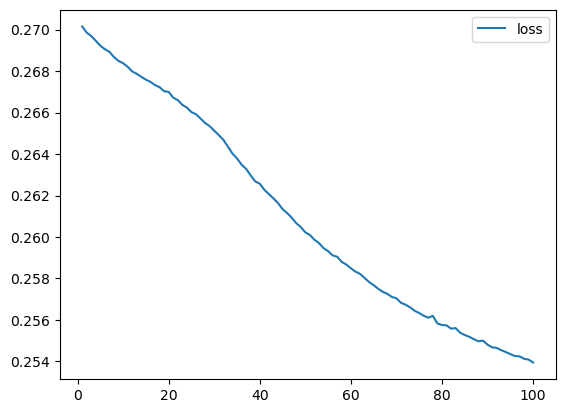

In [26]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

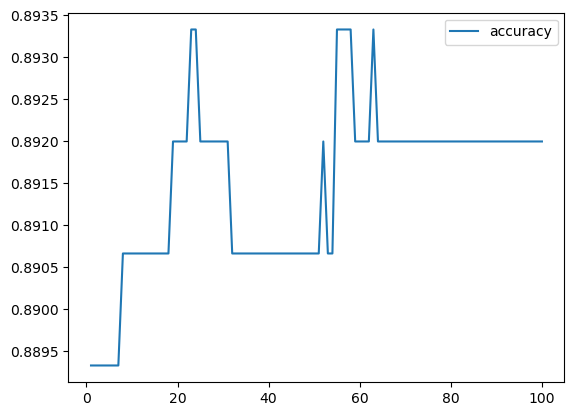

In [29]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [30]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [31]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [32]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.6439 - accuracy: 0.5253
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6147 - accuracy: 0.5693
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5879 - accuracy: 0.6507
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5625 - accuracy: 0.8440
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5381 - accuracy: 0.8560
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5154 - accuracy: 0.8587
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.8627
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.8627
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.8613
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.8640
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9133
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2003 - accuracy: 0.9133
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9147
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.9160
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1968 - accuracy: 0.9173
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.9173
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.9173
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.9173
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1924 - accuracy: 0.9173
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1911 - accuracy: 0.9173
Epoch 93/100


In [33]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

<AxesSubplot:ylabel='Density'>

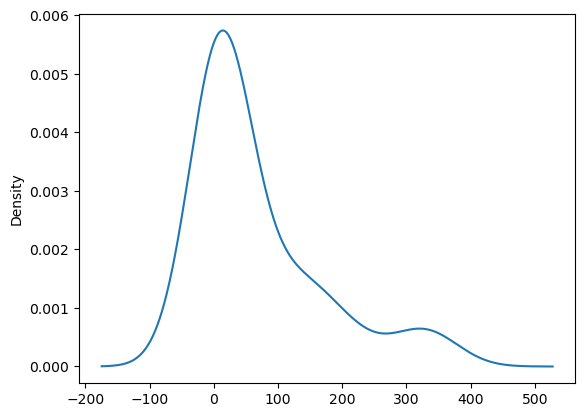

In [34]:
# Visualize the value counts
country_counts.plot.density()

In [35]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [37]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names_out(['Country'])
encode_df.head()

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

C:\Users\ashrs\AppData\Local\Temp\ipykernel_15220\3440917920.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)


,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
